<a href="https://colab.research.google.com/github/NicoAlvPro/03MIAR_Alg_Optimizacion_Nicolas/blob/main/Final_Algoritmos_de_optimizaci%C3%B3n_Trabajo_Pr%C3%A1ctico_Nicolas_Alvarez_Provecho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Trabajo práctico Algoritmos de optimización

Nombre: Nicolás Álvarez Provecho

https://colab.research.google.com/drive/1cTbhHLZNcK8gOWc9k1OL3MUxmhALNsSD

https://github.com/NicoAlvPro/03MIAR_Alg_Optimizacion_Nicolas

Problema:
>2. Organizar los horarios de partidos de La Liga<br>


Descripción del problema:
Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la
audiencia.

....



# Modelo

El problema a solucionar tiene varias restricciones, lo que hace compleja su comprensión en etapas tempranas de su modelado. Sin embargo, su espacio de soluciones se puede simplificar de la siguiente manera:

## ¿Cómo representar el espacio de soluciones?
El objetivo es distribuir los 20 equipos en 10 partidos distintos durante varios días, teniendo en cuenta los números de audiencia y sus restricciones.

Cada día puede haber varios partidos (aunque esto reduzca la audiencia), lo que añade complejidad al problema. Aun así, se puede representar el espacio de soluciones utilizando dos arreglos:

### Representación con arrays

1. **Emparejamiento de los partidos**
   - Se utiliza un array de longitud 20 (tantos elementos como equipos haya). El emparejamiento de los equipos se define de manera consecutiva: el equipo en la posición 0 jugará contra el equipo en la posición 1, el equipo en la posición 2 jugará contra el equipo en la posición 3, y así sucesivamente.
   
   **Ejemplo:**
   ```python
   partidos = ['C6', 'C4', 'B5', 'C5', 'B4', 'B8', 'B6', 'B10', 'B2', 'B1', 'B7', 'C2', 'A2', 'A3', 'A1', 'B11', 'B3', 'C1', 'C3', 'B9']
   ```

2. **Asignación de franjas horarias**
   - Se utiliza un array de longitud 10 (tantos elementos como partidos haya, es decir, 20/2). Cada número representa la franja horaria en la que se jugará el partido. Cada franja horaria está representada por un número incremental.
   
   **Ejemplo:**
   ```python
   franjas_horarias = [9, 0, 3, 6, 7, 1, 8, 4, 5, 2]
   ```

   En este caso:
   - El partido **C6 vs C4** se jugará en la franja horaria **9** (por ejemplo, el lunes).
   - El partido **B5 vs C5** se jugará en la franja horaria **1** (también el lunes).
   - El partido **B4 vs B8** se jugará en la franja horaria **3** (por ejemplo, el sábado a las 18:00 horas), y así sucesivamente.


## ¿Cómo implementar las restricciones?

Este problema tiene muchas restricciones:

- **Reducción de streams por cada franja horaria**: Se crea un array de 10 dimensiones (tantas como posibilidades horarias haya), en el que se almacena el coeficiente reductor de cada franja. Para simplificar su comprensión al lector, se ha creado un array de diccionarios, donde también se almacena el día y la hora para facilitar la lectura, pero estos son datos 'no necesarios'. Es la variable `horas`.

- **Cantidad de streams en función de la categoría de los partidos**: Para obtener este dato de forma sencilla, se ha creado un diccionario dentro de otro diccionario, donde se almacenan los streams que genera cada partido (como si fuera un grafo). Es la variable `streams`.

- **Reducción de streams por cantidad de partidos en la misma franja horaria**: Se crea una función que, dado el número de coincidencias, devuelve el coeficiente reductor (se creó una función, pero se podría mapear manualmente con una variable). Es la función `percentage_coincidences`.


In [113]:
import math
# lista de horarios,  {Viernes 20, Sábado 12, Sábado 16, Sábado 18, Sábado 20, Domingo 12, Domingo 16, Domingo 18, Domingo 20, Lunes 20}.
# En cada posición hay otra lista, donde se meten tantas partidas como haya ese horario
horas= []
horas.append({'Day': 'Viernes', 'Hour': 20, 'Coef': 0.4})
horas.append({'Day': 'Sábado', 'Hour': 12, 'Coef': 0.55})
horas.append({'Day': 'Sábado', 'Hour': 16, 'Coef': 0.7})
horas.append({'Day': 'Sábado', 'Hour': 18, 'Coef': 0.8})
horas.append({'Day': 'Sábado', 'Hour': 20, 'Coef': 1})
horas.append({'Day': 'Domingo', 'Hour': 12, 'Coef': 0.45})
horas.append({'Day': 'Domingo', 'Hour': 16, 'Coef': 0.75})
horas.append({'Day': 'Domingo', 'Hour': 18, 'Coef': 0.85})
horas.append({'Day': 'Domingo', 'Hour': 20, 'Coef': 1})
horas.append({'Day': 'Lunes', 'Hour': 20, 'Coef': 0.4})
print(horas)


streams = {
    'A': {'A': 2, 'B': 1.3, 'C': 1},
    'B': {'A': 1.3, 'B': 0.9, 'C': 0.75},
    'C': {'A': 1, 'B': 0.75, 'C': 0.47}
}
print(streams['A']['A'])


def percentage_coincidences(cant):
  if cant == 0:
    return 1

  cant = min(cant, 7)

  fin_perc, diff = 25, 20
  for _ in range(cant-1):
    fin_perc += diff
    diff = math.ceil(diff / 2) if diff <= 5 else diff - 5
  return 1 - (fin_perc/100)

print(f'Final {percentage_coincidences(0)}')




[{'Day': 'Viernes', 'Hour': 20, 'Coef': 0.4}, {'Day': 'Sábado', 'Hour': 12, 'Coef': 0.55}, {'Day': 'Sábado', 'Hour': 16, 'Coef': 0.7}, {'Day': 'Sábado', 'Hour': 18, 'Coef': 0.8}, {'Day': 'Sábado', 'Hour': 20, 'Coef': 1}, {'Day': 'Domingo', 'Hour': 12, 'Coef': 0.45}, {'Day': 'Domingo', 'Hour': 16, 'Coef': 0.75}, {'Day': 'Domingo', 'Hour': 18, 'Coef': 0.85}, {'Day': 'Domingo', 'Hour': 20, 'Coef': 1}, {'Day': 'Lunes', 'Hour': 20, 'Coef': 0.4}]
2
Final 1


## ¿Cuál es la función objetivo?

La función objetivo será la que se busca maximizar, y en este caso es la función que calcula la cantidad de streams que tienen todos los partidos.

Dicha función tiene en cuenta todas las restricciones para poder calcular, por cada partido, las ganancias.

La función a maximizar es la siguiente:

In [95]:
def calculate_streams(partidos, distrubucion):
  total_streams = 0
  for i, valor in enumerate(distrubucion):
    cant_coincidencias = distrubucion.count(valor)-1
    local_streams = 0
    local_streams += streams[partidos[i*2][0]][partidos[(i*2)+1][0]]
    local_streams = local_streams*percentage_coincidences(cant_coincidencias)
    total_streams += local_streams*horas[valor]['Coef']

  return total_streams


distrubucion = [1,4,7,5,4,9,1,5,5,0]
partidos = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
calculate_streams(partidos, distrubucion)

4.61465

# Análisis

### ¿Qué complejidad tiene el problema? Orden de complejidad y contabilización del espacio de soluciones

Este problema no es demasiado grande, pero es importante analizar su orden de complejidad para evaluar el espacio de soluciones en escenarios más grandes.

En este caso, para calcular el espacio de soluciones, se pueden separar los cálculos en dos partes, tal y como se menciona al principio:
- ¿Cómo hacemos los equipos?
- ¿Cómo repartimos los partidos en los horarios?

#### Hacer equipos

Tenemos 20 equipos y hay que agruparlos de dos en dos sin que se repita ningún equipo (ya que ningún equipo puede jugar dos veces):

Posibilidades = n! / (k! * (n - k)!), donde n = 20 y k = 2.

Por lo tanto, en este caso:
```python
190 = (20 * 19) / 2
```

#### Repartir en horarios

Una vez determinada la cantidad de partidos, es importante calcular cuántas formas de repartirlos hay. En este caso, hay 10 franjas horarias y 10 partidos, por lo que cada partido puede jugarse en 10 franjas horarias diferentes.

Por lo tanto, hay:
```python
10^10
```
posibilidades (10 partidos y cada uno puede jugarse en 10 franjas horarias distintas).

Si tenemos en cuenta la restricción de que al menos debe haber un partido el lunes y otro el viernes:

- **Caso en el que no haya opción de jugar ni lunes ni viernes:**
  ```python
  8^10
  ```
  (10 equipos, 8 posibles franjas horarias).

- **Caso en el que no haya opción de jugar ni lunes ni viernes:**
  ```python
  9^10
  ```
  (10 equipos, 9 posibles franjas horarias).

Restando estas opciones, obtenemos:
```python
10^10 - 8^10 - 9^10 - 9^10
```
posibilidades.

Finalmente, multiplicamos ambas posibilidades:
```python
(10^10 - 8^10) * 190 = 3.71010981 * 10^11
```

Lo que nos da una cantidad muy grande de posibles soluciones.

In [96]:
#Respuesta
cant_equipos = (20*19)/2
print(f'{cant_equipos} posibles combinaciones de equipos')

cant_horarios = 10**10 - 8**10 - 9**10 - 9**10
print(f'{cant_horarios} posibles combinaciones de horarios')


cant_total = cant_equipos*cant_horarios
print(f'{cant_total} posibilidades totales')



190.0 posibles combinaciones de equipos
1952689374 posibles combinaciones de horarios
371010981060.0 posibilidades totales


#Diseño
- ¿Que técnica utilizo? ¿Por qué?

Puede ser intuitivo pensar en dividir el problema en 2, la parte de generar partidos, y otra de cómo repartir los horarios, pero de esta manera nos saltaríamos posibilidades. Si se hace esto, se simplificaría el problema (y posiblemente para este caso funcionaría), pero no se contemplaría ciertos casos.

Por lo tanto, hay que abarcar el problema en su totalidad.

También puede ser intuitivo hacer el reparto de equipos de forma voraz (siempre juntar equipos de categorías grandes antes, y así hasta las más bajas), pero no es siempre el mejor caso en cuanto a streams, y además puede funcionar si no se tiene en cuenta que se pueden dar varios partidos en el mismo horario.

Por lo tanto, esta opción (por muy prometedora que parezca) se descarta, ya que existe la posibilidad de que no nos dé la mejor combinación.

Estamos ante un problema que tiene 371010981060 posibilidades, y afrontar esto con fuerza bruta no es lo mejor. Por lo tanto, hay que buscar un método heurístico, característico por dar buenas soluciones, pero no saber cuán cerca se está de la mejor solución.

Finalmente, se decidió implantar un algoritmo genético para buscar la mejor solución: Al 'probar' muchas soluciones, nos aseguramos de que no nos vamos a atascar en un máximo local (máximo porque este problema es de maximización). Además, al ir cambiando la población de prueba gracias al cruzamiento y a la mutación, vamos a probar muchas más soluciones, que, en función de cómo se haga, pueden ser locales o no (es decir, si tenemos un individuo bueno, podemos encontrar uno mejor 'cerca' o incluso probar otros diferentes).

Además, se va a hacer el algoritmo genético implantando un elitismo, de tal manera que los 2 mejores individuos de la población siempre se mantengan, para que la función de fitness nunca baje de generación en generación.

In [97]:
equipos = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
print(equipos)

['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']


Construcción de algoritmo genético

In [98]:
import random
def genera_individuo():

  partidos_aletorios = equipos.copy()
  random.shuffle(partidos_aletorios)

  distrubucion_aleatoria = [random.randint(0, 9) for _ in range(8)]
  distrubucion_aleatoria.append(0)
  distrubucion_aleatoria.append(9)
  random.shuffle(distrubucion_aleatoria) # con lo anterior aseguramos que tenga al menos un 0 y  un 9

  return partidos_aletorios, distrubucion_aleatoria



def genera_poblacion(n):
  poblacion = []
  for _ in range(n):
    poblacion.append(genera_individuo())
  return poblacion

def evaluar_poblacion(poblacion):
  streams = []
  for i in poblacion:
     streams.append(calculate_streams(i[0],i[1]))
  return streams


def seleccion(poblacion, streams):
  indices_ordenacion = sorted(range(len(streams)), key=lambda k: streams[k], reverse=True)
  return [poblacion[i] for i in indices_ordenacion]


def cruzar(poblacion, elitismo = 0):
  # la forma de cruzar es un corte e intercambio
  nueva_poblacion = []
  # si hay elitismo, se mantienen tal cual
  for i in range(elitismo):
    nueva_poblacion.append(poblacion[i])

  # para generar la nueva poblacion , se tienen en cuenta los del elitismo, y no los 'peores'
  for i in range(0, len(poblacion)-1-elitismo, 2):
    padre1_partidos = poblacion[i][0]
    padre1_distribucion = poblacion[i][1]
    padre2_partidos = poblacion[i+1][0]
    padre2_distribucion = poblacion[i+1][1]

    corte = random.randint(1, len(padre1_partidos)-1)
    # hijo1_partidos = padre1_partidos[:corte] + padre2_partidos[corte:]
    # hijo2_partidos = padre2_partidos[:corte] + padre1_partidos[corte:]
    hijo1_partidos = padre2_partidos
    hijo2_partidos = padre1_partidos

    corte = random.randint(1, len(padre1_distribucion)-1)
    hijo1_distribucion = padre1_distribucion[:corte] + padre2_distribucion[corte:]
    hijo2_distribucion = padre2_distribucion[:corte] + padre1_distribucion[corte:]

    nueva_poblacion.append((hijo1_partidos, hijo1_distribucion))
    nueva_poblacion.append((hijo2_partidos, hijo2_distribucion))

  return nueva_poblacion



def mutar(poblacion, elitismo=0):
    nueva_poblacion = []
    for i in range(elitismo):
        nueva_poblacion.append(poblacion[i])

    for i in range(elitismo, len(poblacion)):
        partidos, distribucion = poblacion[i]

        # Mutar partidos (intercambio aleatorio de dos partidos)
        idx1, idx2 = random.sample(range(len(partidos)), 2)
        partidos_mutados = partidos[:]  # Crear una copia para evitar modificar la población original
        partidos_mutados[idx1], partidos_mutados[idx2] = partidos_mutados[idx2], partidos_mutados[idx1]

        # Mutar distribución (cambio aleatorio en un elemento)
        idx = random.randint(0, len(distribucion)-1)
        distribucion_mutada = distribucion[:]
        distribucion_mutada[idx] = random.randint(0, 9)

        #Aseguramos que haya al menos un 0 y un 9
        if 0 not in distribucion_mutada:
            distribucion_mutada[random.randint(0, len(distribucion_mutada)-1)] = 0
        if 9 not in distribucion_mutada:
            distribucion_mutada[random.randint(0, len(distribucion_mutada)-1)] = 9

        nueva_poblacion.append((partidos_mutados, distribucion_mutada))

    return nueva_poblacion




Mejor: Fitness = 7.223000000000001, Distribucion: [1, 0, 6, 2, 9, 7, 8, 5, 3, 4], Partidos: ['C4', 'B9', 'B1', 'C5', 'B10', 'B4', 'C2', 'B8', 'C3', 'C1', 'B2', 'B5', 'B6', 'A1', 'B3', 'C6', 'B7', 'B11', 'A3', 'A2']


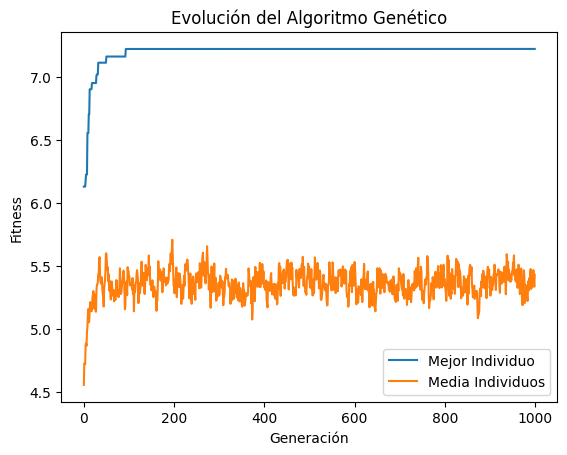

Partidos: ['C4', 'B9', 'B1', 'C5', 'B10', 'B4', 'C2', 'B8', 'C3', 'C1', 'B2', 'B5', 'B6', 'A1', 'B3', 'C6', 'B7', 'B11', 'A3', 'A2']
Distribucion: [1, 0, 6, 2, 9, 7, 8, 5, 3, 4]
Fitness = 7.223000000000001 


In [99]:
import matplotlib.pyplot as plt

def evolucionar(poblacion = 50 , n_generaciones= 100,graph = True, verbose = False):
  poblacion = genera_poblacion(poblacion)

  mejor_individuo_arr = []
  media_individuos_arr = []

  for generacion in range(n_generaciones):

    streams_aptitude = evaluar_poblacion(poblacion)

    poblacion = seleccion(poblacion, streams_aptitude)

    mejor_generacion = poblacion[0]


    suma = sum(streams_aptitude)
    cantidad = len(streams_aptitude)
    media = suma / cantidad

    mejor_individuo_arr.append(max(streams_aptitude))
    media_individuos_arr.append(media)

    if verbose:
      print(f"Generación {generacion+1}:")
      print(f"Media: {media}:")
      print(f"  Individuo {i+1}: Fitness = {calculate_streams(mejor_generacion[0], mejor_generacion[1])}, Distribucion: {mejor_generacion[1]}, Partidos: {mejor_generacion[0]}")


    # Cruzar los individuos
    poblacion = cruzar(poblacion, elitismo=2)

    # Mutar los individuos
    poblacion = mutar(poblacion, elitismo=2)

  #Mostrar el mejor individuo encontrado
  mejor_individuo = poblacion[0]

  print(f"\nMejor: Fitness = {calculate_streams(mejor_individuo[0], mejor_individuo[1])}, Distribucion: {mejor_individuo[1]}, Partidos: {mejor_individuo[0]}")
  if graph:
    plt.plot(mejor_individuo_arr, label='Mejor Individuo')
    plt.plot(media_individuos_arr, label='Media Individuos')

    plt.xlabel('Generación')
    plt.ylabel('Fitness')
    plt.title('Evolución del Algoritmo Genético')

    plt.legend()

    plt.show()

  return mejor_individuo


solucion = evolucionar(poblacion =40, n_generaciones=1000)

print(f"Partidos: {solucion[0]}\nDistribucion: {solucion[1]}\nFitness = {calculate_streams(solucion[0], solucion[1])} ")




# Conclusión

Tras probar varias combinaciones de n_población, n_generaciones, y varios tipos de cruzamiento y mutación, se obtienen estos resultados.

En la gráfica, se puede ver que no son necesarias tantas iteraciones, ya que con las 50 o 100 primeras ya CASI se obtiene el máximo, por lo tanto la mejor ejecución sería la siguiente, incluso reduciendo su población individual:




Mejor: Fitness = 7.222499999999999, Distribucion: [3, 9, 1, 2, 6, 5, 4, 7, 0, 8], Partidos: ['B6', 'B9', 'C3', 'B4', 'B5', 'C4', 'B7', 'C5', 'B8', 'C1', 'B11', 'C6', 'A2', 'A3', 'B2', 'B3', 'B1', 'C2', 'A1', 'B10']


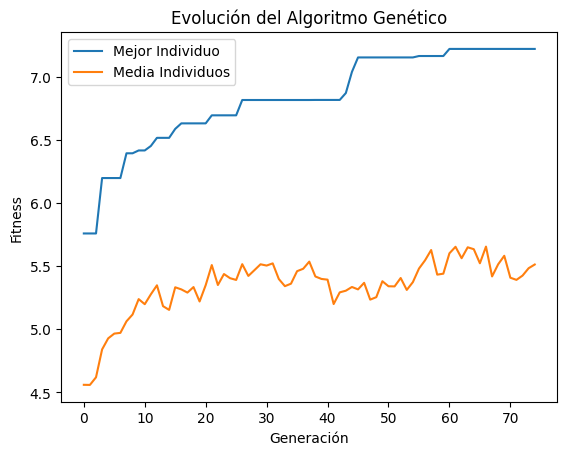

Partidos: ['B6', 'B9', 'C3', 'B4', 'B5', 'C4', 'B7', 'C5', 'B8', 'C1', 'B11', 'C6', 'A2', 'A3', 'B2', 'B3', 'B1', 'C2', 'A1', 'B10']
Distribucion: [3, 9, 1, 2, 6, 5, 4, 7, 0, 8]
Fitness = 7.222499999999999 


In [100]:
solucion = evolucionar(poblacion =30, n_generaciones=75)
print(f"Partidos: {solucion[0]}\nDistribucion: {solucion[1]}\nFitness = {calculate_streams(solucion[0], solucion[1])} ")

Por lo tanto, una de las mejores ejecuciones que ha salido, ha conseguido unos streamings de 7.222499999999999M  con los partidos:

In [114]:
indices_ordenacion = [indice for indice, _ in sorted(enumerate(solucion[1]), key=lambda x: x[1])]


for i, ind_ord in enumerate(indices_ordenacion):
  print(f'{solucion[0][ind_ord*2]} vs {solucion[0][(ind_ord*2)+1]}: {horas[i]["Day"]} {horas[i]["Hour"]}')

print(f'Con un total de {calculate_streams(solucion[0], solucion[1])} streamings')



B1 vs C2: Viernes 20
B5 vs C4: Sábado 12
B7 vs C5: Sábado 16
B6 vs B9: Sábado 18
A2 vs A3: Sábado 20
B11 vs C6: Domingo 12
B8 vs C1: Domingo 16
B2 vs B3: Domingo 18
A1 vs B10: Domingo 20
C3 vs B4: Lunes 20
Con un total de 7.222499999999999 streamings


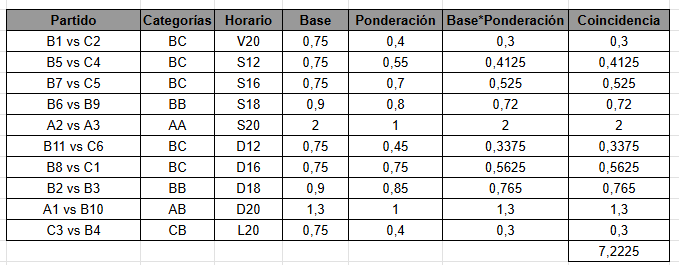